#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

For Numeric data there are many EDA techniques which include visualizing the distribution (distribution curve), looking at summary statistics, and looking at correlation between the variables. For categorical data there are many EDA techniques which include visualizing the distribution (bar charts) in order to see all of the categories and the total number of observations within each category. For looking at the relationship between categorical and numeric data you can look at distributions or summary statistics of the numeric data in each possible category. For example if you have a categorical variable of A or B you can look at the distributions of observations that fall in A and compare it to the distributions of observations that fall in B.  

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [24]:
import pandas as pd
import numpy as np

np.random.seed(1)

categorical = [chr(i) for i in range(ord("A"), ord("A") + 10)]
cat_col = np.random.choice(categorical, size = 1000)

num_col = np.random.randn(1000)
num_col1 = np.random.uniform(0,100, 1000)

fake_data = pd.DataFrame({
    "cat": cat_col,
    "num": num_col,
    "num1": num_col1
})

fake_data.head()

,cat,num,num1
0,F,0.574622,79.517712
1,I,-1.515758,92.255165
2,J,-0.213175,63.370167
3,F,-0.532299,78.902936
4,A,0.342087,30.821211


cat
A    111
G    110
C    110
H    102
E     99
D     97
J     96
F     96
B     92
I     87
Name: count, dtype: int64


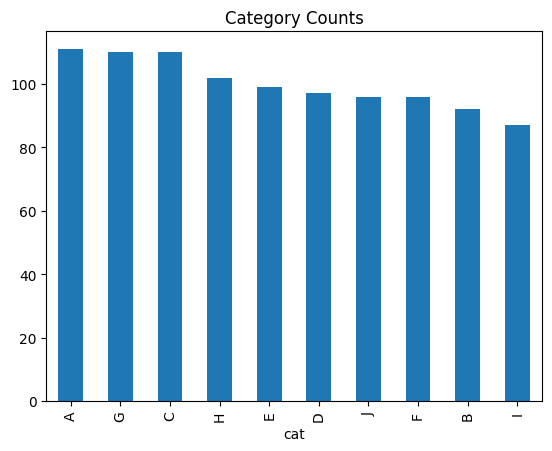

In [25]:
import matplotlib.pyplot as plt

fake_data["cat"].value_counts().plot(kind = "bar")

plt.title("Category Counts")

print(fake_data["cat"].value_counts())


count    1000.000000
mean       -0.000070
std         1.003690
min        -2.825550
25%        -0.691321
50%        -0.012087
75%         0.672892
max         2.995501
Name: num, dtype: float64


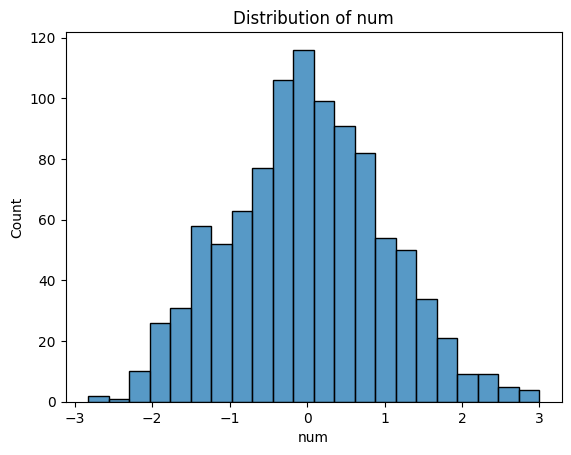

In [26]:
import seaborn as sns

sns.histplot(fake_data["num"])
plt.title("Distribution of num")

print(fake_data["num"].describe())


count    1000.000000
mean       51.226326
std        29.472305
min         0.246850
25%        25.233407
50%        51.856104
75%        76.892009
max        99.921115
Name: num1, dtype: float64


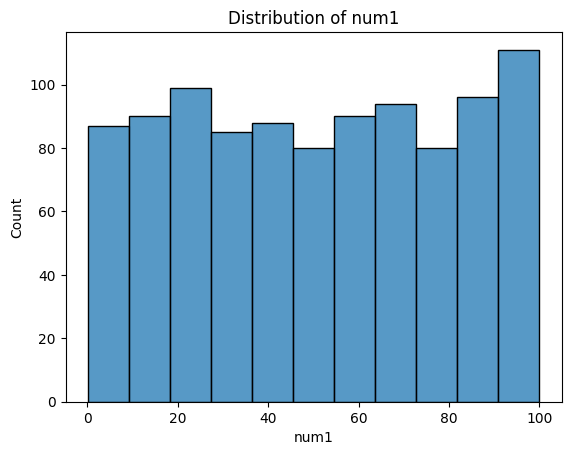

In [27]:
sns.histplot(fake_data["num1"])
plt.title("Distribution of num1")

print(fake_data["num1"].describe())


Text(0.5, 1.0, 'Distribution of num by Category of cat')

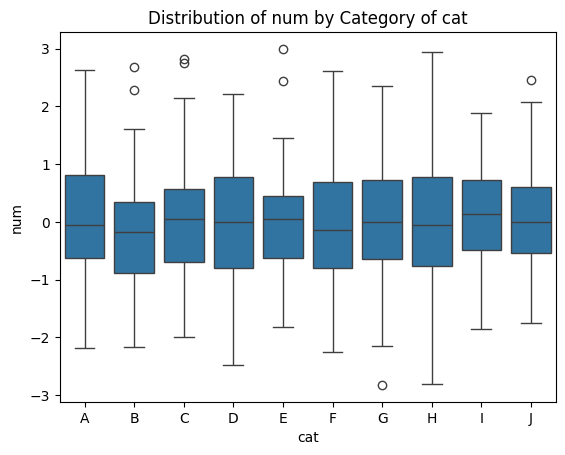

In [28]:
plt.figure()
sns.boxplot(x = "cat", y = "num", data = fake_data, order = sorted(fake_data["cat"].unique()))
plt.title("Distribution of num by Category of cat")

Text(0.5, 1.0, 'Distribution of num1 by Category of cat')

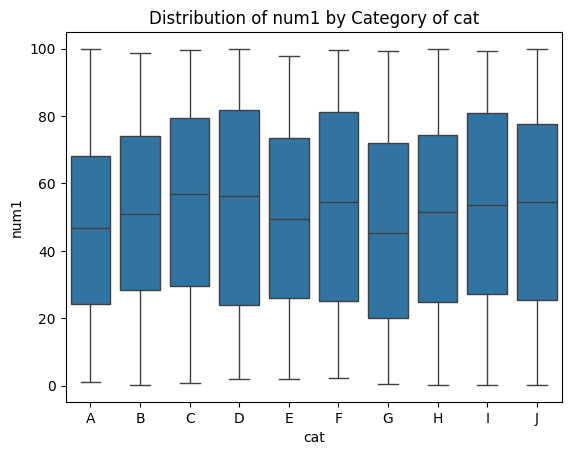

In [29]:
plt.figure()
sns.boxplot(x = "cat", y = "num1", data = fake_data, order = sorted(fake_data["cat"].unique()))
plt.title("Distribution of num1 by Category of cat")

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [30]:
#Creating all non target columns for data
np.random.seed(1)

categorical = [chr(i) for i in range(ord("A"), ord("A") + 5)]
cat_col = np.random.choice(categorical, size = 1000)

num_col = np.random.randn(1000)
num_col1 = np.random.uniform(0,100, 1000)
num_col2 = np.random.randint(337,785,1000)
num_col3 = np.random.poisson(21,1000)

fake_data1 = pd.DataFrame({
    "cat": cat_col,
    "num": num_col,
    "num1": num_col1,
    "num2": num_col2,
    "num3": num_col3
})

rng = np.random.default_rng(1)
for col in fake_data1:
    if col != "cat":
        mask = rng.random(fake_data1.shape[0]) < 0.05
        fake_data1.loc[mask, col] = np.nan

print(fake_data1.isna().mean()) 
fake_data1.head()

cat     0.000
num     0.047
num1    0.050
num2    0.063
num3    0.050
dtype: float64


,cat,num,num1,num2,num3
0,D,0.816044,10.275656,409.0,25.0
1,E,-0.612407,77.258027,NaN,27.0
2,A,0.393109,13.720600,739.0,22.0
3,B,-1.823920,42.429237,393.0,29.0
4,D,1.167075,27.195611,509.0,20.0


In [42]:
#adding a target column
#Used AI (ChatGPT) to help research a way/method to create a target score that was a noisy expression of the other columns)
from sklearn.impute import SimpleImputer

num_cols = ["num", "num1", "num2", "num3"]
imp = SimpleImputer(strategy = "mean")
X_num = imp.fit_transform(fake_data1[num_cols])

#turning categorical column into codes
cat_codes = fake_data1["cat"].astype("category").cat.codes.to_numpy()

#noisy function to get target
target_score = (
    0.25 * X_num[:, 0]
    + 0.33 * X_num[:, 1]
    - 0.05 * X_num[:, 2]
    + 0.33 * X_num[:, 3]
    - 0.25 * cat_codes
    + rng.normal(0,1, len(fake_data1))
)

prob = 1 / (1 + np.exp(-target_score))
fake_data1["tar"] = rng.random(len(fake_data1)) < prob

fake_data1.head()

,cat,num,num1,num2,num3,tar
0,D,0.816044,10.275656,409.0,25.0,False
1,E,-0.612407,77.258027,NaN,27.0,True
2,A,0.393109,13.720600,739.0,22.0,False
3,B,-1.823920,42.429237,393.0,29.0,True
4,D,1.167075,27.195611,509.0,20.0,False


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [44]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Renaming fake_data1 to df and "tar" to "target" to match given code
df = fake_data1.rename(columns = {"tar": "target"})

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    # - process numeric features (using an imputer and StandardScaler)
    # - define your pipeline using `pipeline = ...` 

# TODO: #Process numeric and categorical features
    numeric_features = X.select_dtypes(include = ["number"]).columns.tolist()
    categorical_features = X.select_dtypes(include = ["object", "category", "bool"]).columns.tolist()

    #Defining pipelines
    numeric_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])

    categorical_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_pipeline, numeric_features),
            ("cat", categorical_pipeline, categorical_features),
        ]
    )

    # Full pipeline
    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("clf", classifier),
    ])
    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.919, std=0.022
Fold scores: [0.93  0.931 0.896 0.946 0.891]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [46]:
from sklearn.ensemble import RandomForestClassifier

scores = run_classifier(df,RandomForestClassifier(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))


F1 (5-fold): mean=0.885, std=0.030
Fold scores: [0.889 0.864 0.925 0.906 0.841]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

My data shows the opposite where LogisticRegression performed slightly better than RandomForestClassifier. This is likely because of the function used to create the target column from the other columns was noisy but still somewhat linear. This would allow logit to perform better. This could likely be somewhat explained by the fact that my data is randomly generated and thus noisy.